### Importance of Meanders : look at Victoria Sill

In [19]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
plt.rcParams['font.size'] = 16

In [21]:
# Start with 2015
year = 2015

In [22]:
def check_nan(ds):
    for j, index in enumerate(ds.index):
        if ds.transport.iloc[j] != ds.transport.iloc[j]:
            print (index)

In [23]:
def read_file(filestub, years):
    output = {}
    for year in years:
        output[year]= pd.read_csv(f'{filestub}_{year}_v3.csv', index_col=0, parse_dates=True).fillna(0)
        print (year, output[year].transport.mean()/1000.); check_nan(output[year])
    return output

### 1. Tidal Period Loops ###

Water Flux = 0.3792823806294098
-7838.676303203902
24.32981054080392


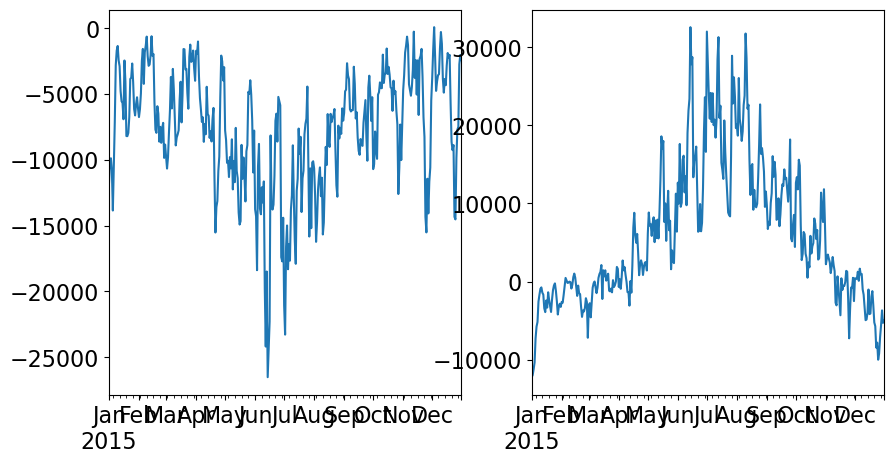

In [24]:
section = 'Vic'
TidalPump_VS = pd.read_csv(f'{section}_tidalpump_{year}_v3.csv', index_col=0, parse_dates=True)
TidalPump_transport = (TidalPump_VS.transport).mean()/1e6
TidalPump_salt_transport = TidalPump_VS.transport * (TidalPump_VS.final_salt - TidalPump_VS.init_salt)
TidalPump_heat_transport = TidalPump_VS.transport * (TidalPump_VS.final_temp - TidalPump_VS.init_temp) 
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
TidalPump_salt_transport.plot(ax=axs[0])
TidalPump_heat_transport.plot(ax=axs[1])
print ('Water Flux =', TidalPump_transport) 
print (TidalPump_salt_transport.mean()*1024/1000)
print (TidalPump_heat_transport.mean()*3989.24*1024/1e9) # potential enthalpy in GW

### 2. Loops Longer than a Day ###

Water Flux = 0.080322092739547
-94110.30882003673
309.08488293032366


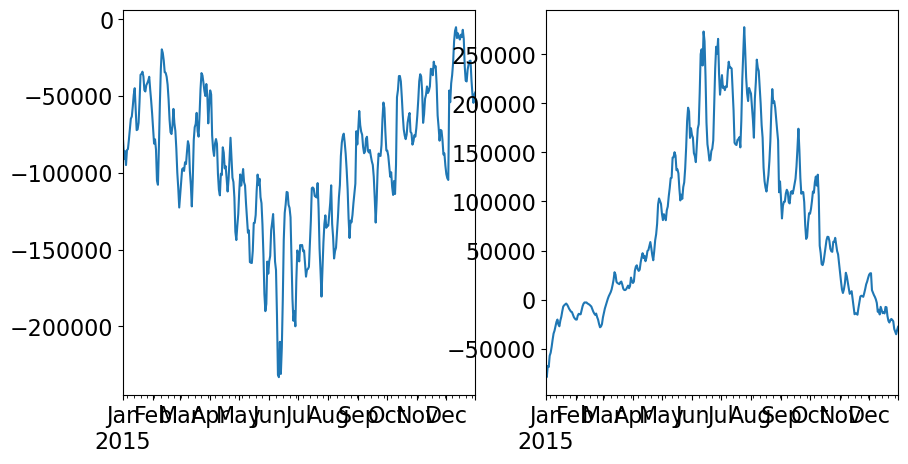

In [25]:
section = 'Vic'
LongLoops_VS = pd.read_csv(f'{section}_loops_{year}_v3.csv', index_col=0, parse_dates=True)

LongLoops_transport = (LongLoops_VS.transport).mean()/1e6
LongLoops_salt_transport = LongLoops_VS.transport * (LongLoops_VS.final_salt - LongLoops_VS.init_salt) 
LongLoops_heat_transport = LongLoops_VS.transport * (LongLoops_VS.final_temp - LongLoops_VS.init_temp) 
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
LongLoops_salt_transport.plot(ax=axs[0])
LongLoops_heat_transport.plot(ax=axs[1])
print ('Water Flux =', LongLoops_transport) 
print (LongLoops_salt_transport.mean()*1024/1000)
print (LongLoops_heat_transport.mean()*3989.24*1024/1e9) # potential enthalpy in GW

### 3. Flux to the East from Vic ###

2015 23.260960949873397
2015 23.16950381813652
2015 2.3577895169012235
2015 2.3915417662123404
2015 32.110630574864786
2015 0.7806178800182778
Water Flux = 0.0584811464804448
1942878.200105417
2102.2707311731374


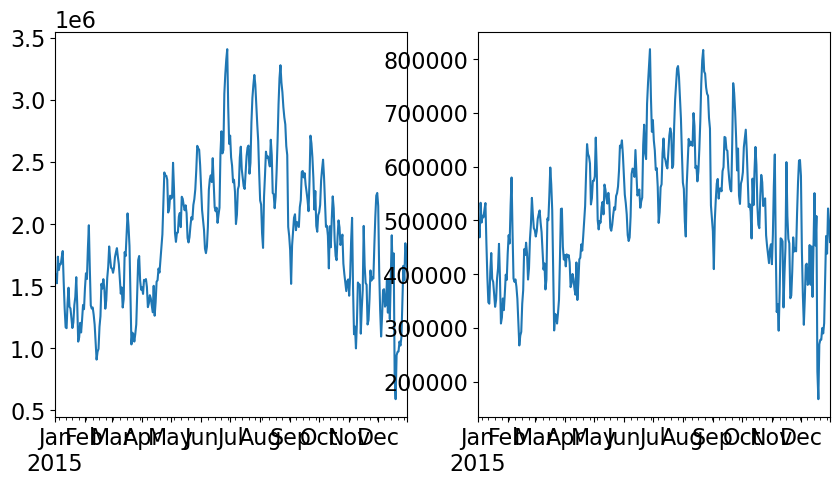

In [26]:
VtPR = read_file('Vic_to_PR', years=[2015])
PRfV = read_file('PR_from_Vic', years=[2015])
VtGI = read_file('Vic_to_GI', years=[2015])
GIfV = read_file('GI_from_Vic', years=[2015])
PSfV = read_file('Puget_from_VS', years=[2015])
DfV = read_file('Discovery_from_VS', years=[2015])

East_transport =  ( 0.5 * (PRfV[2015].transport + VtPR[2015].transport) +
                     0.5 * (VtGI[2015].transport + GIfV[2015].transport) +
                     PSfV[2015].transport + DfV[2015].transport 
                  )

East_salt_flux = (0.5 * (PRfV[2015].transport * PRfV[2015].final_salt + 
                          VtPR[2015].transport * VtPR[2015].init_salt) +
                   0.5 * (GIfV[2015].transport * GIfV[2015].final_salt + 
                          VtGI[2015].transport * VtGI[2015].init_salt) +
                     PSfV[2015].transport * PSfV[2015].init_salt +
                    DfV[2015].transport * DfV[2015].init_salt 
                    )
East_heat_flux =  (0.5 * (PRfV[2015].transport * PRfV[2015].final_temp + 
                          VtPR[2015].transport * VtPR[2015].init_temp) +
                   0.5 * (GIfV[2015].transport * GIfV[2015].final_temp + 
                          VtGI[2015].transport * VtGI[2015].init_temp) +
                     PSfV[2015].transport * PSfV[2015].init_temp +
                    DfV[2015].transport * DfV[2015].init_temp 
                    )
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
East_salt_flux.plot(ax=axs[0]);
East_heat_flux.plot(ax=axs[1]);
print ('Water Flux =', East_transport.mean()/1e6) 
print ((East_salt_flux*1024/1000).mean())
print (East_heat_flux.mean()*3989.24*1024/1e9) # potential enthalpy in GW

### 4. Flux From the East ###

2015 23.923387363466393
2015 24.05030665710093
2015 8.115411705285158
2015 7.975172729078504
2015 36.452681171980096
2015 1.3163327846499968
Water Flux = -0.06980115318409559
-2200661.498099107
-2946.2706363391535


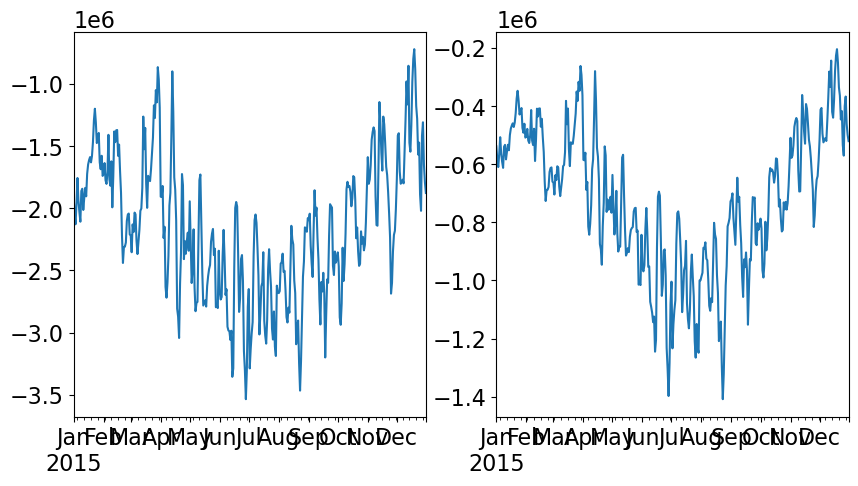

In [27]:
PRtV = read_file('PR_to_Vic', years=[2015])
VfPR = read_file('Vic_from_PR', years=[2015])
GItV = read_file('GI_to_Vic', years=[2015])
VfGI = read_file('Vic_from_GI', years=[2015])
PStV = read_file('Puget_to_VS', years=[2015])
DtV = read_file('Discovery_to_VS', years=[2015])

West_transport = -( 0.5 * (PRtV[2015].transport + VfPR[2015].transport) +
                     0.5 * (GItV[2015].transport + VfGI[2015].transport) +
                     PStV[2015].transport + DtV[2015].transport)
West_salt_flux = -(0.5 * (PRtV[2015].transport * PRtV[2015].final_salt + 
                          VfPR[2015].transport * VfPR[2015].init_salt) +
                     0.5 * (GItV[2015].transport * GItV[2015].final_salt + 
                          VfGI[2015].transport * VfGI[2015].init_salt) +
                     PStV[2015].transport * PStV[2015].init_salt +
                    DtV[2015].transport * DtV[2015].init_salt 
                    )
West_heat_flux = -(0.5 * (PRtV[2015].transport * PRtV[2015].final_temp + 
                          VfPR[2015].transport * VfPR[2015].init_temp) +
                     0.5 * (GItV[2015].transport * GItV[2015].final_temp + 
                          VfGI[2015].transport * VfGI[2015].init_temp) +
                     PStV[2015].transport * PStV[2015].init_temp +
                    DtV[2015].transport * DtV[2015].init_temp 
                    )
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
West_salt_flux.plot(ax=axs[0]);
West_heat_flux.plot(ax=axs[1]);
print ('Water Flux =', West_transport.mean()/1e6) 
print ((West_salt_flux*1024/1000).mean())
print (West_heat_flux.mean()*3989.24*1024/1e9) # potential enthalpy in GW

### 5. Barotropic Flux to Vic ###

Water Flux = -0.011320006703650786
-370616.62847106456
-424.019062395486


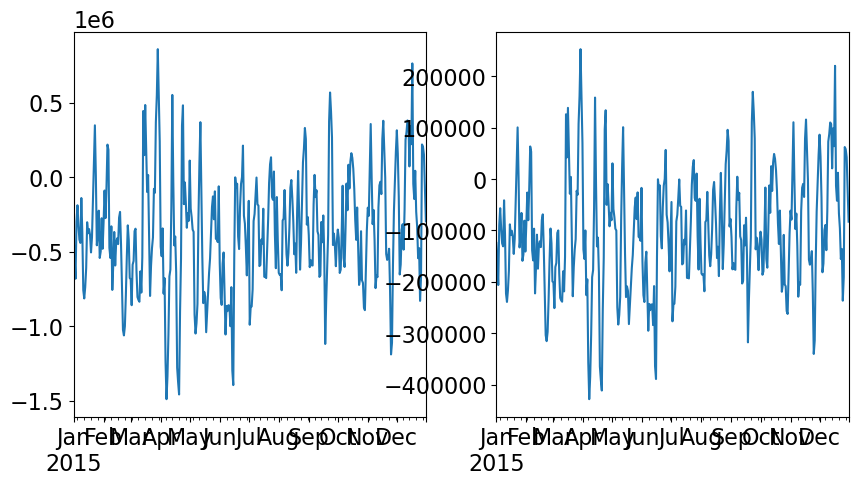

In [30]:
barotropic = (East_transport + West_transport)
#appropriate_mean_salt = (PRfV[2015].init_salt + PRtV[2015].init_salt)/2.
barotropic_flux = barotropic * use_salt  #see salt calculation below
barotropic_heat = barotropic * use_heat
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
barotropic_flux.plot(ax=axs[0])
barotropic_heat.plot(ax=axs[1])
print ('Water Flux =', barotropic.mean()/1e6) 
print ((barotropic_flux*1024/1000).mean())
print (barotropic_heat.mean()*3989.24*1024/1e9) # potential enthalpy in GW

### 6. Baroclinic Flux to Vic ###

Water Flux = 0.06414114983227019
112833.33047737423
-419.9808427705298


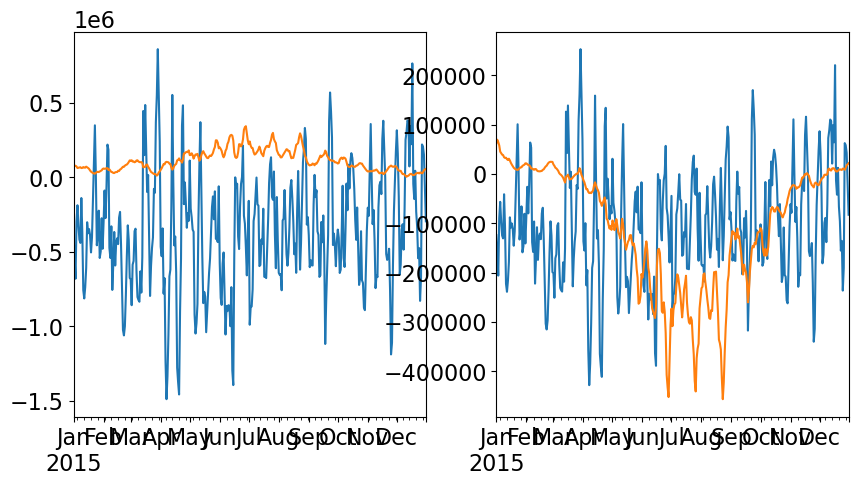

In [31]:
# barotropic = shallow + deep (shallow is larger and negative so barotropic flux is negative)
# baroclinic = shallow - deep  (negative as defined)
# shallow = 1/2 barotropic + 1/2 baroclinic
# deep = 1/2 barotropic - 1/2 baroclinic

# However to be consistent with Loops which we only count in one direction we halve the flux here!!!

baroclinic = 0.5*(East_transport - West_transport) 
baroclinic_flux = ((East_salt_flux + West_salt_flux)
    - barotropic_flux)
baroclinic_heat = ((East_heat_flux + West_heat_flux) 
                   - barotropic_heat)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
barotropic_flux.plot(ax=axs[0])
baroclinic_flux.plot(ax=axs[0])
barotropic_heat.plot(ax=axs[1])
baroclinic_heat.plot(ax=axs[1])
print ('Water Flux =', baroclinic.mean()/1e6) 
print ((baroclinic_flux*1024/1000).mean())
print (baroclinic_heat.mean()*3989.24*1024/1e9) # potential enthalpy in GW

In [13]:
print (East_transport.mean(), West_transport.mean(), barotropic.mean(), baroclinic.mean())

58481.1464804448 -69801.15318409559 -11320.006703650786 64141.149832270195


In [14]:
print (East_salt_flux.mean(), West_salt_flux.mean(), barotropic_flux.mean(), baroclinic_flux.mean())

1897341.9922904463 -2149083.4942374094 -361930.30124127393 110188.79929431075


In [15]:
print (West_salt_flux.mean()*1.024 + East_salt_flux.mean()*1.024) 

-257783.29799369024


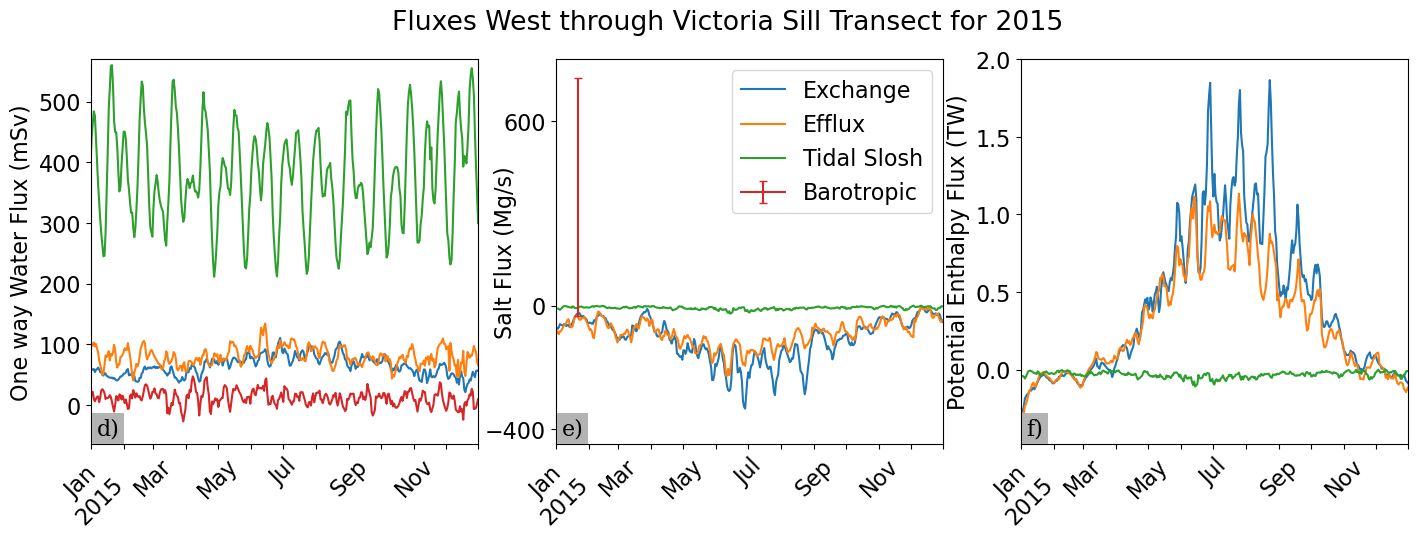

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(17, 5))
mylabels = ['d)', 'e)', 'f)']

(baroclinic/1000.).plot(ax=axs[0], label="Exchange")
((LongLoops_VS.transport)/1000).plot(ax=axs[0], label="Efflux")
((TidalPump_VS.transport)/1000).plot(ax=axs[0], label="Tidal Slosh")
(-barotropic/1000.).plot(ax=axs[0], label="Barotropic")
#axs[0].legend()
axs[0].set_ylabel('One way Water Flux (mSv)')
(-baroclinic_flux/1024).plot(ax=axs[1], label="Exchange")
(LongLoops_salt_transport/1024).plot(ax=axs[1], label="Efflux")
(TidalPump_salt_transport/1024).plot(ax=axs[1], label="Tidal Slosh");
#(-barotropic_flux/1024.).plot(ax=axs[1], label="Barotropic")
# Barotropic
mean_baro = (-barotropic_flux/1024.).mean()
std_baro = (-barotropic_flux/1024.).std()
axs[1].errorbar(dt.datetime(2015, 1, 22), mean_baro, capsize=3, yerr=std_baro,  color='tab:red', label='Barotropic')

axs[1].legend()
axs[1].set_ylabel('Salt Flux (Mg/s)')
axs[1].yaxis.set_label_coords(-0.1, 0.2)
(-baroclinic_heat*3989.24*1024/1e12).plot(ax=axs[2], label="Exchange")
(LongLoops_heat_transport*3989.24*1024/1e12).plot(ax=axs[2], label="Efflux")
(TidalPump_salt_transport*3989.24*1024/1e12).plot(ax=axs[2], label="Tidal Slosh");
# Barotropic
#mean_baro = (-barotropic_heat*3989.24*1024/1e9).mean()
#std_baro = (-barotropic_heat*3989.24*1024/1e9).std()
#axs[2].errorbar(dt.datetime(2015, 1, 22), mean_baro, capsize=3, yerr=std_baro,  color='r', label='Barotropic')

#axs[1].legend()
axs[1].set_ylabel('Salt Flux (Mg/s)')
#axs[2].legend()
axs[2].set_ylabel('Potential Enthalpy Flux (TW)')

for ii, ax in enumerate(axs):
    ax.minorticks_off()
    ax.tick_params(axis='x', labelrotation=45)
    for label in ax.xaxis.get_ticklabels()[1::2]:
        label.set_visible(False)
    ax.text(0.015, 0.012, mylabels[ii], transform=ax.transAxes,
            fontsize=16, verticalalignment='bottom', fontfamily='serif',
            bbox=dict(facecolor='0.7', edgecolor='none', pad=3.0))

axs[1].set_yticks([-400, 0, 600])
axs[0].set_ylim(-65, 570)
axs[1].set_ylim(-450, 800)
axs[2].set_ylim(-0.48, 2)

fig.suptitle('Fluxes West through Victoria Sill Transect for 2015');
fig.savefig('west_fluxes_VS.png');
fig.savefig('west_fluxes_VS.pdf');

In [37]:
print ('Exchange', (baroclinic_flux/1024).mean(), 'Reflux',
(-LongLoops_salt_transport/1024).mean(), 'Slosh', 
(-TidalPump_salt_transport/1024).mean(), 'Barotropic', (-barotropic_flux/1024.).mean())
print ( (-LongLoops_salt_transport/1024).mean()/((baroclinic_flux/1024).mean()+(-LongLoops_salt_transport/1024).mean()+(-TidalPump_salt_transport/1024).mean()) )

Exchange 107.60624931085034 Reflux 89.75058443072962 Slosh 7.475544264987851 Barotropic 353.4475598059316
0.43816600336423284


[[1.         0.85733839]
 [0.85733839 1.        ]]
[[1.         0.98359355]
 [0.98359355 1.        ]]
[[1.         0.99130527]
 [0.99130527 1.        ]]


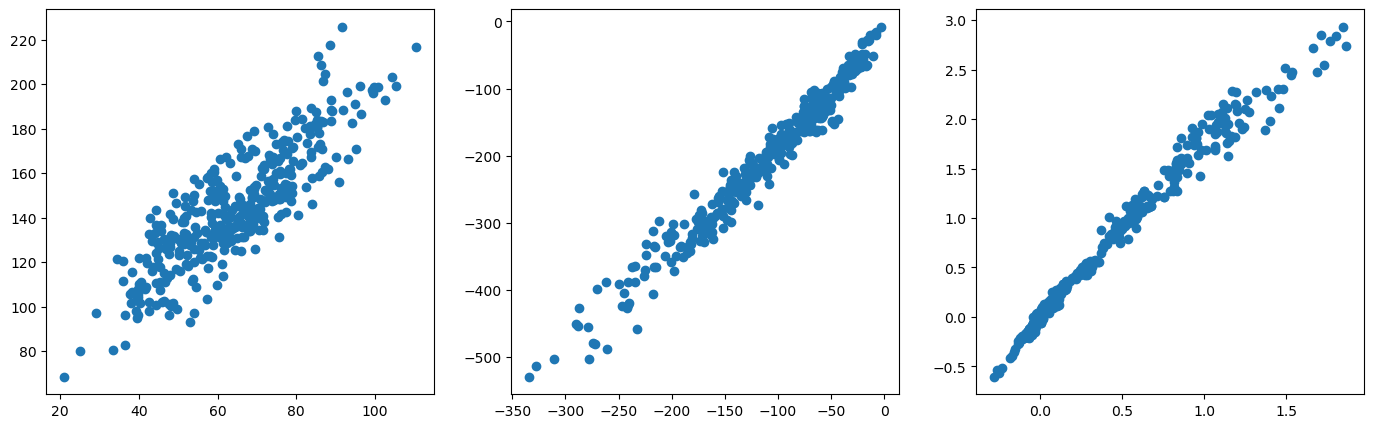

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(17, 5))
axs[0].plot((baroclinic/1000.), (baroclinic/1000.)+(LongLoops_VS.transport)/1000, 'o')
axs[1].plot((-baroclinic_flux/1024), (-baroclinic_flux/1024)+(LongLoops_salt_transport/1024), 'o')
axs[2].plot((-baroclinic_heat*3989.24*1024/1e12), 
            (-baroclinic_heat*3989.24*1024/1e12) + (LongLoops_heat_transport*3989.24*1024/1e12), 'o');

y = (baroclinic/1000.) + (LongLoops_VS.transport)/1000
x = (baroclinic/1000.)
nansInArray = (np.isnan(y) | np.isnan(x))
print (np.corrcoef(x[~nansInArray], y[~nansInArray]))

y = (-baroclinic_flux/1024) + (LongLoops_salt_transport)/1024
x = (-baroclinic_flux/1024.)
nansInArray = (np.isnan(y) | np.isnan(x))
print (np.corrcoef(x[~nansInArray], y[~nansInArray]))

y = (-baroclinic_heat) + LongLoops_heat_transport
x = (-baroclinic_heat)
nansInArray = (np.isnan(y) | np.isnan(x))
print (np.corrcoef(x[~nansInArray], y[~nansInArray]))

### appendix A 

379282.3806294098 80322.092739547 58481.1464804448
1897341.9922904463
31.937600865293824
-69801.15318409559
31.530971799232244


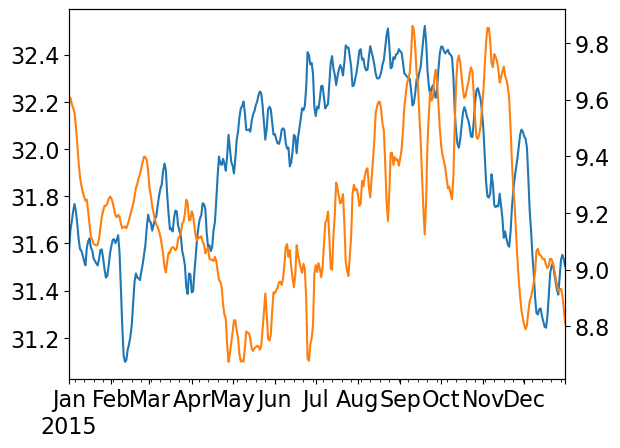

In [29]:
# calculate the appropriate salinity
# all salt heading south
#print (appropriate_mean_salt.mean())
water_east = (TidalPump_VS.transport + LongLoops_VS.transport
            + East_transport)
print (TidalPump_VS.transport.mean(), LongLoops_VS.transport.mean(), East_transport.mean())
salt_east = (TidalPump_VS.transport * TidalPump_VS.init_salt +
             LongLoops_VS.transport * LongLoops_VS.init_salt +
             + East_salt_flux)
print (East_salt_flux.mean())

heat_east = (TidalPump_VS.transport * TidalPump_VS.init_temp +
             LongLoops_VS.transport * LongLoops_VS.init_temp +
             + East_heat_flux)
print ((salt_east/water_east).mean())

water_west = (TidalPump_VS.transport + LongLoops_VS.transport 
                - West_transport)
print (West_transport.mean())
salt_west = (TidalPump_VS.transport * TidalPump_VS.final_salt +
             LongLoops_VS.transport * LongLoops_VS.final_salt +
             - West_salt_flux)
heat_north = (TidalPump_VS.transport * TidalPump_VS.final_temp +
             LongLoops_VS.transport * LongLoops_VS.final_temp +
            -  West_salt_flux)
print ((salt_west/water_west).mean())

fig, ax = plt.subplots(1, 1)
(salt_east/water_east).plot(ax=ax)
ax2 = ax.twinx()
(heat_east/water_east).plot(ax=ax2, c='tab:orange')
use_salt = salt_east/water_east
use_heat = heat_east/water_east
#print (use_salt, use_heat)

In [ ]:
29.338216487871687
29.778549601767686
29.79851159310874

29.338216487871687
29.676517253083794
29.83986003245676


In [ ]:
print (South_transport)

The grand sum

In [ ]:
4450 + 39586 - 1033156 + 867004 + 129462

In [ ]:
plt.plot(PRfV[2015].init_salt - PRfV[2015].final_salt)
plt.plot(VtPR[2015].init_salt - VtPR[2015].final_salt)
plt.plot(GIfV[2015].init_salt - GIfV[2015].final_salt)
plt.plot(VtGI[2015].init_salt - VtGI[2015].final_salt)
plt.plot(PSfV[2015].init_salt - PSfV[2015].final_salt)
plt.plot(DfV[2015].init_salt - DfV[2015].final_salt)

In [ ]:
#plt.plot(PRtV[2015].final_salt - PRtV[2015].init_salt)
#plt.plot(VfPR[2015].init_salt - VfPR[2015].final_salt)
plt.plot(PStV[2015].init_salt - PStV[2015].final_salt)

### Age of Efflux ###

In [14]:
def Efflux_age(year):
    section = 'Vic'
    LongLoops_VS = pd.read_csv(f'{section}_loops_{year}_v3.csv', index_col=0, parse_dates=True)
    
    LongLoops_transport = (LongLoops_VS.transport).mean()
    LongLoops_age = (LongLoops_VS.transport * LongLoops_VS.final_age).mean() / LongLoops_transport 
    print ('Year = ', year)
    print ('Water Flux =', LongLoops_transport) 
    print (LongLoops_age)
    return LongLoops_age

In [15]:
a2015 = Efflux_age('2015')
a2016 = Efflux_age('2016')
a2017 = Efflux_age('2017')
a2018 = Efflux_age('2018')
print (0.25*(a2015 + a2016 + a2017 + a2018))

Year =  2015
Water Flux = 80322.092739547
8.327474512012282
Year =  2016
Water Flux = 79726.22986668845
8.202726893451583
Year =  2017
Water Flux = 80192.7694912403
8.264514445958332
Year =  2018
Water Flux = 79423.4507909128
8.245858382212742
8.260143558408735


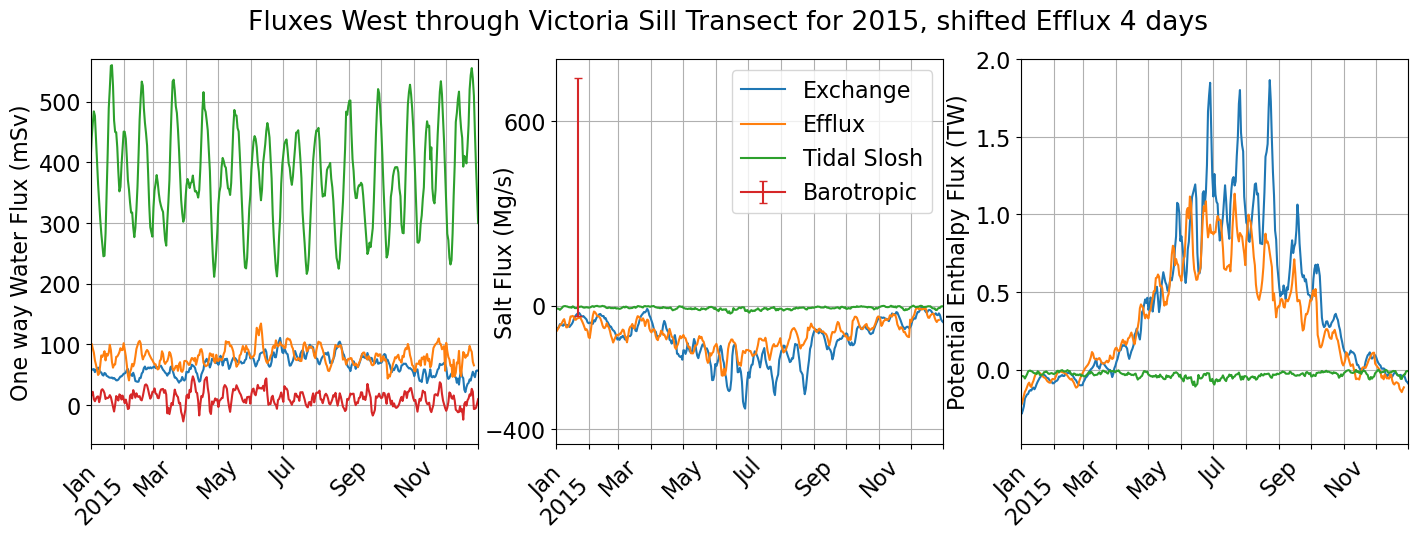

In [36]:
fig, axs = plt.subplots(1, 3, figsize=(17, 5))

(baroclinic/1000.).plot(ax=axs[0], label="Exchange")
((LongLoops_VS.shift(periods=-4).transport)/1000).plot(ax=axs[0], label="Efflux")
((TidalPump_VS.transport)/1000).plot(ax=axs[0], label="Tidal Slosh")
(-barotropic/1000.).plot(ax=axs[0], label="Barotropic")
#axs[0].legend()
axs[0].set_ylabel('One way Water Flux (mSv)')
(-baroclinic_flux/1024).plot(ax=axs[1], label="Exchange")
(LongLoops_salt_transport.shift(periods=-4)/1024).plot(ax=axs[1], label="Efflux")
(TidalPump_salt_transport/1024).plot(ax=axs[1], label="Tidal Slosh");
#(-barotropic_flux/1024.).plot(ax=axs[1], label="Barotropic")
# Barotropic
mean_baro = (-barotropic_flux/1024.).mean()
std_baro = (-barotropic_flux/1024.).std()
axs[1].errorbar(dt.datetime(2015, 1, 22), mean_baro, capsize=3, yerr=std_baro,  color='tab:red', label='Barotropic')

axs[1].legend()
axs[1].set_ylabel('Salt Flux (Mg/s)')
axs[1].yaxis.set_label_coords(-0.1, 0.2)
(-baroclinic_heat*3989.24*1024/1e12).plot(ax=axs[2], label="Exchange")
(LongLoops_heat_transport.shift(periods=-4)*3989.24*1024/1e12).plot(ax=axs[2], label="Efflux")
(TidalPump_salt_transport*3989.24*1024/1e12).plot(ax=axs[2], label="Tidal Slosh");
# Barotropic
#mean_baro = (-barotropic_heat*3989.24*1024/1e9).mean()
#std_baro = (-barotropic_heat*3989.24*1024/1e9).std()
#axs[2].errorbar(dt.datetime(2015, 1, 22), mean_baro, capsize=3, yerr=std_baro,  color='r', label='Barotropic')

#axs[1].legend()
axs[1].set_ylabel('Salt Flux (Mg/s)')
#axs[2].legend()
axs[2].set_ylabel('Potential Enthalpy Flux (TW)')

for ii, ax in enumerate(axs):
    ax.minorticks_off()
    ax.tick_params(axis='x', labelrotation=45)
    for label in ax.xaxis.get_ticklabels()[1::2]:
        label.set_visible(False)
    ax.grid()

axs[1].set_yticks([-400, 0, 600])
axs[0].set_ylim(-65, 570)
axs[1].set_ylim(-450, 800)
axs[2].set_ylim(-0.48, 2)

fig.suptitle('Fluxes West through Victoria Sill Transect for 2015, shifted Efflux 4 days');